In [3]:
#Ahora implementaremos Boosting

#importamos librerías

import pandas as pd


from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

if __name__ == '__main__':

    dt_heart = pd.read_csv('./data/heart.csv')
    print(dt_heart['target'].describe())

    X = dt_heart.drop(['target'], axis=1)
    y = dt_heart['target']

    X_train, X_test , y_train, y_test = train_test_split(X,y, test_size=0.35)

count    1025.000000
mean        0.513171
std         0.500070
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: target, dtype: float64


In [2]:
#definimos el clasificador:

boost = GradientBoostingClassifier(n_estimators=50).fit(X_train, y_train)
boost_pred = boost.predict(X_test)

print("="*64)
print("Gradient Boosting",accuracy_score(boost_pred, y_test))

Gradient Boosting 0.9080779944289693


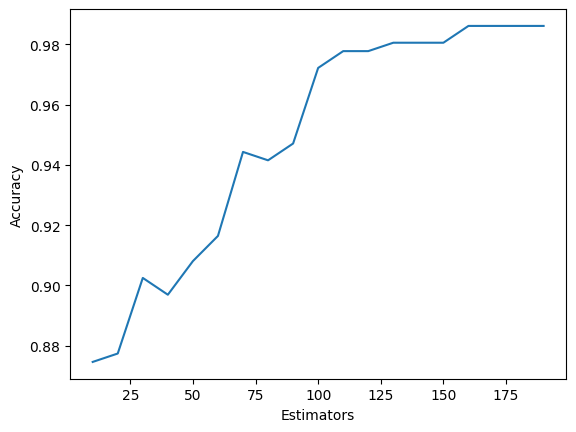

160


<Figure size 640x480 with 0 Axes>

In [5]:
#Ahora probaremos diferentes estimadores y lo veremos en una gráfica

import matplotlib.pyplot as plt
import numpy as np


estimators = range(10,200,10)
total_accuracy = {}
for i in estimators:
    boost = GradientBoostingClassifier(n_estimators=i).fit(X_train,y_train)
    boost_pred = boost.predict(X_test)

    total_accuracy[i] = accuracy_score(y_test, boost_pred)

plt.plot(estimators, total_accuracy.values())
plt.xlabel('Estimators')
plt.ylabel('Accuracy')
plt.show()
plt.savefig('Boost.png')

max_accu = np.array(list(total_accuracy.values())).max()
best_est_num = {k: v for k, v in total_accuracy.items()
                if v == max_accu}
best_est_num = list(best_est_num)
print(best_est_num[0])



Podemos observar que con lo anterior podemos ssaber cuánto sería el mínimo numero de estimadores que se necesita para lograr la máxima precisión posible